In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import time
from tqdm import tqdm
import funcs as ff
import os
from VAE import VAE
from datetime import datetime

# check that the environment is fine
print('TensorFlow version : ', tf.__version__ )
print('NumPy version : ', np.__version__ )
print('keras version : ', tf.keras.__version__)
print('gpu list : ', tf.config.list_physical_devices())


TensorFlow version :  2.4.0-rc0
NumPy version :  1.21.0
keras version :  2.4.0
gpu list :  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:

'''
DIRECTORIES
'''
cwd = '/Volumes/Seagate Backup Plus Drive/EXPERIMENTS' #os.getcwd()

serie_dir = os.path.join(cwd, 'Embeddings/vae200')
if not os.path.isdir(serie_dir):
    os.makedirs(serie_dir)

datasets_dir = '/Volumes/Seagate Backup Plus Drive/datasets/vae200'
if not os.path.isdir(datasets_dir):
    os.makedirs(datasets_dir)



model_names = None
for it, (root, dirs, files) in enumerate(os.walk(serie_dir)):
    print('level : {}\nroot : {}'.format(it, root))
    print('files')
    for name in files:
        print(name)
    print('dirs')
    for name in dirs:
        print(name)
    model_names = dirs
    break

modelpaths = []
models = []
files_to_write_val = []
files_to_write_test = []
backbones = [
    tf.keras.applications.DenseNet121(include_top=False, pooling='avg'),
    tf.keras.applications.DenseNet169(include_top=False, pooling='avg'),
    tf.keras.applications.DenseNet201(include_top=False, pooling='avg'),
    tf.keras.applications.InceptionResNetV2(include_top=False, pooling='avg'),
    tf.keras.applications.Xception(include_top=False, pooling='avg')]

latent_dim = 200

for it, name in enumerate(model_names):
    if it == 0:
        modelpaths.append(os.path.join(serie_dir, name, '_epoch_7.hdf5'))
    else:
        modelpaths.append(os.path.join(serie_dir, name, '_epoch_9.hdf5'))
    vae = VAE(number_of_classes=0, latent_dim=latent_dim, input_shape=(224, 224, 3), backbone=backbones[it])
    print(modelpaths[it])
    vae.vae.load_weights(modelpaths[it], by_name=False)
    models.append(vae)
    files_to_write_val.append(os.path.join(datasets_dir, name + '-val'))
    files_to_write_test.append(os.path.join(datasets_dir, name + '-test'))

print('cwd : ', cwd)
print('serie dir : ', serie_dir)

level : 0
root : /Volumes/Seagate Backup Plus Drive/EXPERIMENTS/Embeddings/vae200
files
.DS_Store
DenseNet121-vae200-Decision Tree-Auroc.png
DenseNet121-vae200-Extremely Randomized Trees-Auroc.png
DenseNet121-vae200-KNN-Auroc.png
DenseNet121-vae200-Random Forest-Auroc.png
DenseNet169-vae200-Decision Tree-Auroc.png
DenseNet169-vae200-Extremely Randomized Trees-Auroc.png
DenseNet169-vae200-KNN-Auroc.png
DenseNet169-vae200-Random Forest-Auroc.png
DenseNet201-vae200-Decision Tree-Auroc.png
DenseNet201-vae200-Extremely Randomized Trees-Auroc.png
DenseNet201-vae200-KNN-Auroc.png
DenseNet201-vae200-Random Forest-Auroc.png
Xception-vae200-Decision Tree-Auroc.png
Xception-vae200-Extremely Randomized Trees-Auroc.png
Xception-vae200-KNN-Auroc.png
Xception-vae200-Random Forest-Auroc.png
dirs
DenseNet121-vae200
DenseNet169-vae200
DenseNet201-vae200
InceptionResNet-vae200
Xception-vae200
/Volumes/Seagate Backup Plus Drive/EXPERIMENTS/Embeddings/vae200/DenseNet121-vae200/_epoch_7.hdf5
/Volumes/Seagat

In [3]:
def record_parser(example):
    example_fmt = {
        'label': tf.io.FixedLenFeature([14], tf.float32),
        'image': tf.io.FixedLenFeature([],tf.string, default_value='')}
    parsed = tf.io.parse_single_example(example, example_fmt)
    image = tf.io.decode_png(parsed["image"],channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, parsed['label']

# actually not used
def reduce_channels(x, y):
    return tf.expand_dims((x[:, :, 0] + x[:, :, 1] + x[:, :, 2])/3, axis=-1), y


def make_dataset(filename):
    base_path = '/Volumes/Seagate Backup Plus Drive/datasets/chexpert-tfrecords'
    full_path = os.path.join(base_path,filename)
    dataset = tf.data.TFRecordDataset(full_path)
    parsed_dataset = dataset.map(record_parser,num_parallel_calls = tf.data.experimental.AUTOTUNE)
    return parsed_dataset

batch_size = 32

#train_ds = make_dataset('new_training_cropped.tfrecords')
val_ds = make_dataset('validation_cropped.tfrecords')#.map(reduce_channels)
test_ds = make_dataset('test_set_cropped.tfrecords')
label_names = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
                'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [4]:
def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float64_feature(value):
  return tf.train.Feature(float_list=tf.train.FloatList(value=value))

0it [00:00, ?it/s]2021-07-28 00:12:15.323689: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-28 00:12:15.324161: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz
1911it [05:24,  5.88it/s]
202it [00:33,  5.95it/s]
1911it [06:49,  4.66it/s]
202it [00:43,  4.65it/s]
1911it [08:05,  3.93it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
202it [00:50,  4.04it/s]
1911it [09:28,  3.36it/s]
202it [01:01,  3.30it/s]
1911it [05:20,  5.96it/s]
202it [00:32,  6.13it/s]


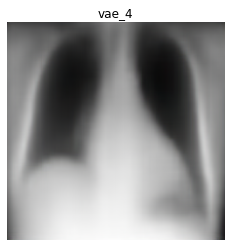

In [5]:
def make_tfrecords(writer, dataset, model, plot_example = False):
    for img, label in tqdm(dataset):
        img = tf.expand_dims(img, axis=0)
        # get the feature space from the autoencoder, already sampled
        x_rec, z_mean, z_logsigma = model(img)
        # transform labels and embeddings in list in order to pass them to the
        # function that transforms them in protobuffer compatible types
        z_mean = list(tf.reshape(z_mean, [200]))
        z_logsigma = list(tf.reshape(z_logsigma, [200]))
        label_list = list(label)

        # create the dictionary required to create a Feature
        feature_dict = {'label': _float64_feature(label_list),
                        'z_mean': _float64_feature(z_mean),
                        'z_logsigma': _float64_feature(z_logsigma)
                        }

        #feature_dict = {'label': _float64_feature(label_list)}
        #Create a feature
        feature = tf.train.Features(feature=feature_dict)

        #create an example, which requires a feature and basically is a single
        #entry in the tfRecord file
        example = tf.train.Example(features=feature)

        #actually write to file
        writer.write(example.SerializeToString())

    if plot_example:
        fig = plt.figure(1)
        plt.title(model.name)
        plt.imshow(x_rec[0, :, :, :])
        plt.axis('off')


#writer object to write the val tfRecord file
for it, filename in enumerate(files_to_write_val):
    writer = tf.io.TFRecordWriter(filename)
    n = 0
    inf_times = []
    w_times = []

    # training (with validation)
    make_tfrecords(writer, val_ds, models[it], True)
    writer.close()
    # valid (with test)
    writer = tf.io.TFRecordWriter(files_to_write_test[it])
    make_tfrecords(writer, test_ds, models[it])
    writer.close()

#print('single inference time : ', tf.reduce_mean(inf_times))

In [6]:
print('###########################'
      'inizia il test che tutto sia andato a buon fine'
      '###########################')

datasets = []
for root, dirs, files in os.walk(datasets_dir):
    for file in files:
        datasets.append(os.path.join(root, file))
print(datasets)

def embeddings_record_parser(example):
    example_fmt = {
        'label': tf.io.FixedLenFeature(shape=[14], dtype=tf.float32),
        'z_mean': tf.io.FixedLenFeature(shape=[200], dtype=tf.float32),
        'z_logsigma' : tf.io.FixedLenFeature(shape=[200], dtype=tf.float32)
    }
    #example_fmt = {'label': tf.io.FixedLenFeature([14], tf.float64)}
    parsed = tf.io.parse_single_example(example, example_fmt)

    return parsed['label'], parsed['z_mean'], parsed['z_logsigma']

def make_embeddings_ds(filename):
    dataset = tf.data.TFRecordDataset(filename)
    parsed_dataset = dataset.map(embeddings_record_parser,num_parallel_calls = tf.data.experimental.AUTOTUNE)
    return parsed_dataset

batch_size = 5
ds_prova = make_embeddings_ds(filename).batch(batch_size)

###########################inizia il test che tutto sia andato a buon fine###########################
['/Volumes/Seagate Backup Plus Drive/datasets/vae200/.DS_Store', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/DenseNet121-vae200-test', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/DenseNet121-vae200-val', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/DenseNet169-vae200-test', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/DenseNet169-vae200-val', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/DenseNet201-vae200-test', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/DenseNet201-vae200-val', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/InceptionResNet-vae200-test', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/InceptionResNet-vae200-val', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/Xception-vae200-test', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/Xception-vae200-val', '/Volumes/Seagate Backup Plus Drive/datasets/vae200/test

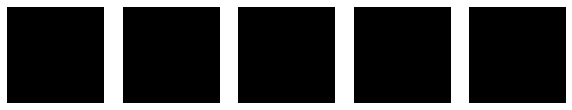

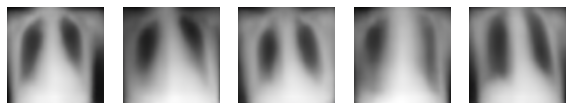

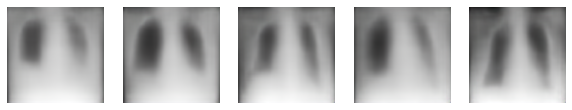

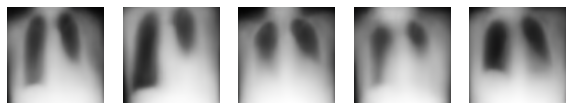

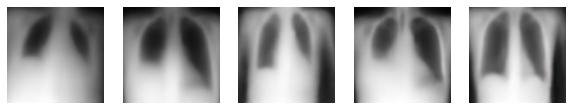

In [7]:
for it, model in enumerate(models):
    for label, z_mean, z_logsigma in ds_prova.take(1):
        imgs = model.decode(z_mean)
        imgs = ff.normalize_tensor(imgs)
        fig = plt.figure(figsize=(10, 10))
        for i in range(batch_size):
            plt.subplot(1, batch_size, i + 1)
            plt.imshow(imgs[i, :, :, :])
            plt.axis('off')